# Project







## Link to github repository
https://github.com/X9126/dsci-100-2025ss-individual/tree/main

## Introduction
The video game industry has seen major growth, with players of all ages joining in. To keep players engaged, developers and marketers are paying closer attention to player behavior, especially when it comes to game newsletters. Understanding which types of players are most likely to subscribe can help tailor communication strategies and boost long-term player retention.



## Question 
Can experience and played hours predict newsletter subscription in the players dataset?


## Data Description
This analysis uses the `players.csv` dataset, which contains `196` records and `7` variables describing individual game players. The dataset was provided by a research group at `UBC` studying player behavior in a `Minecraft` server environment. The dataset includes both `categorical` and `numerical` variables. These variables are: `experience`, a `categorical` variable indicating the player’s self-reported gaming experience (e.g., `Pro`, `Veteran`); `subscribe`, a `boolean` variable showing whether the player subscribed to a game-related newsletter; `played_hours`, a `numerical` variable representing the total hours played; `Age`, a `numerical` variable recording the player’s age; `gender`, a `categorical` variable for gender identity; and two identifier variables, `name` and `hashedEmail`, which are excluded from analysis.

Among the `numerical` variables, `played_hours` ranges from `0` to `95` hours, with a mean of about `9.8` and a median of around `2.0`, indicating a right-skewed distribution. The `Age` variable ranges from `8` to `29`, with an average of about `17.3` and `2` missing values that need to be handled before modeling. The `categorical` variables such as `experience` and `gender` will require encoding during analysis. This project will use `experience`, `played_hours`, `gender`, and `Age` as explanatory variables to predict the binary target variable `subscribe`. The dataset is suitable for both `prediction` and `player-type comparison`, as `experience` can also serve as a grouping variable. Overall, the data is clean, organized, and mostly complete, with only minimal preprocessing needed before modeling.

## Methods & Results

In [1]:
library(tidyverse)    
library(tidymodels) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players <- read_csv("players.csv")

clean_players <- players |>
  select(experience, played_hours, subscribe) |>
  mutate(subscribe = as.factor(subscribe)) 

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
head(clean_players)

experience,played_hours,subscribe
<chr>,<dbl>,<fct>
Pro,30.3,TRUE
Veteran,3.8,TRUE
Veteran,0.0,FALSE
Amateur,0.7,TRUE
Regular,0.1,TRUE
Amateur,0.0,TRUE


In [4]:
clean_players |>
  group_by(experience) |>
  summarize(count = n())

experience,count
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


In [5]:
clean_players |>
  summarize(
    min_hours = min(played_hours),
    max_hours = max(played_hours),
    mean_hours = mean(played_hours),
    median_hours = median(played_hours))

min_hours,max_hours,mean_hours,median_hours
<dbl>,<dbl>,<dbl>,<dbl>
0,223.1,5.845918,0.1


In [6]:
set.seed(1234)
players_split <- initial_split(clean_players, prop = 0.7, strata = subscribe)
players_training <- training(players_split)
players_testing  <- testing(players_split)

In [7]:
players_recipe <- recipe(subscribe ~ experience + played_hours, data = players_training) |>
  step_scale(played_hours) |>
  step_center(played_hours)

In [8]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

In [10]:
k_vals <- tibble(neighbors = seq (from = 1,to= 50, by = 2))

In [11]:
players_vfold <- vfold_cv(players_training, v = 5, strata = subscribe)

In [14]:
players_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_tune) |>
  tune_grid(resamples = players_vfold, grid = k_vals)

In [35]:
best_results <- collect_metrics(players_fit)|>
  group_by(.metric) |>
  filter(mean == max(mean))
best_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
27,accuracy,binary,0.7354497,5,0.012851807,Preprocessor1_Model14
31,accuracy,binary,0.7354497,5,0.012851807,Preprocessor1_Model16
33,accuracy,binary,0.7354497,5,0.012851807,Preprocessor1_Model17
37,accuracy,binary,0.7354497,5,0.005291005,Preprocessor1_Model19
39,accuracy,binary,0.7354497,5,0.005291005,Preprocessor1_Model20
41,accuracy,binary,0.7354497,5,0.005291005,Preprocessor1_Model21
43,accuracy,binary,0.7354497,5,0.005291005,Preprocessor1_Model22
45,accuracy,binary,0.7354497,5,0.005291005,Preprocessor1_Model23
45,roc_auc,binary,0.5408036,5,0.049780209,Preprocessor1_Model23


In [36]:
players_wflow <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_tune)

In [37]:
final_model <- finalize_workflow(players_wflow, best_k) |>
  fit(data = players_training)

In [23]:
players_predictions <- predict(final_model, players_testing) |>
                       bind_cols(players_testing)

In [38]:
metrics(players_predictions, truth = subscribe, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7333333
kap,binary,0.0000000


In [39]:
conf_mat(players_predictions, truth = subscribe, estimate = .pred_class)

          Truth
Prediction FALSE TRUE
     FALSE     0    0
     TRUE     16   44

In [40]:
head(players_predictions)

.pred_class,experience,played_hours,subscribe,correct
<fct>,<chr>,<dbl>,<fct>,<chr>
TRUE,Pro,30.3,TRUE,Correct
TRUE,Veteran,0.0,FALSE,Incorrect
TRUE,Regular,0.1,TRUE,Correct
TRUE,Amateur,0.0,TRUE,Correct
TRUE,Amateur,0.1,TRUE,Correct
TRUE,Amateur,0.2,TRUE,Correct


In [41]:
library(tidyverse)
library(tidymodels)

In [28]:
players_predictions <- players_predictions |>  
  mutate(correct = if_else(subscribe == .pred_class, "Correct", "Incorrect"))

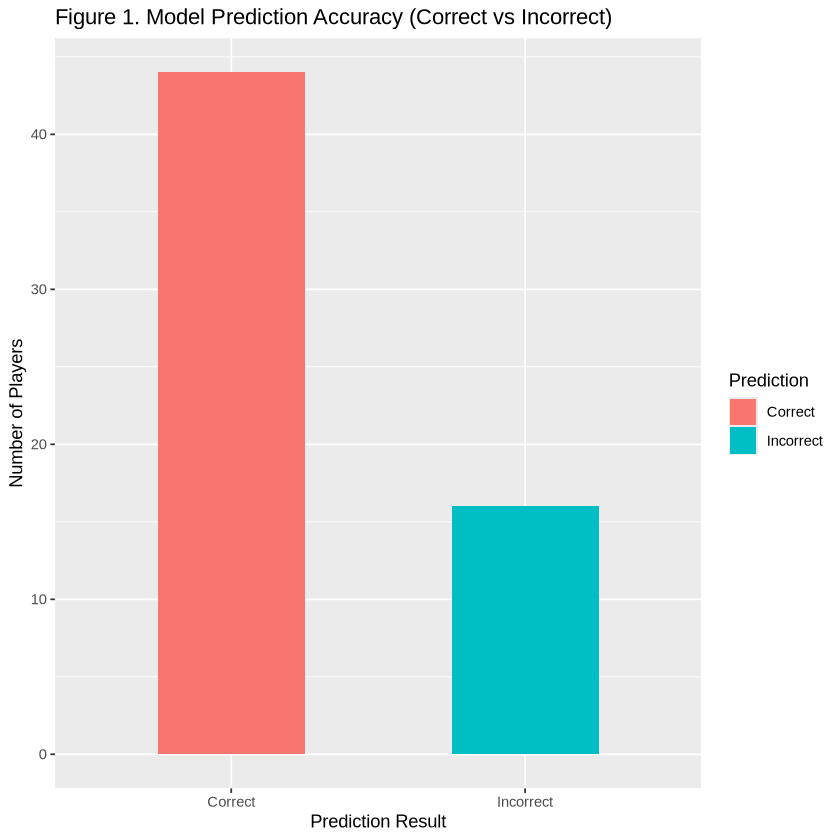

In [29]:
players_predictions |>
  ggplot(aes(x = correct, fill = correct)) +
  geom_bar(width = 0.5) +
  labs(title = "Figure 1. Model Prediction Accuracy (Correct vs Incorrect)",
    x = "Prediction Result",
    y = "Number of Players",
    fill = "Prediction")

**Figure 1. Model Prediction Accuracy (Correct vs Incorrect):**  
This bar plot compares the number of correct and incorrect predictions made by the k-nearest neighbors (k-NN) model. The model correctly predicted 44 cases and incorrectly predicted 16, indicating a relatively high prediction accuracy.

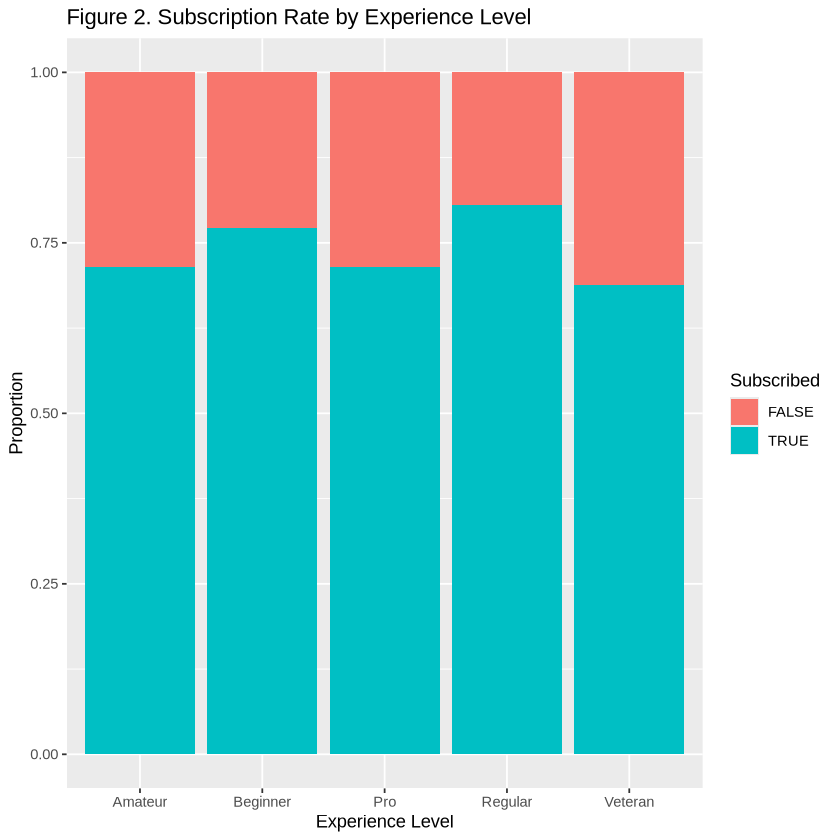

In [30]:
experience_plot <- ggplot(clean_players, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(title = "Figure 2. Subscription Rate by Experience Level",
    x = "Experience Level",
    y = "Proportion",
    fill = "Subscribed" )
experience_plot

**Figure 2. Subscription Rate by Experience Level:**  
This stacked bar plot shows the proportion of subscribed vs. unsubscribed players across different experience levels. The subscription rates are generally high and fairly consistent across groups, but the “Regular” group stands out with a noticeably higher subscription proportion compared to others.

In [31]:
played_hours_avg <- clean_players |>
  group_by(subscribe) |>
  summarize(mean_hours = mean(played_hours, na.rm = TRUE))

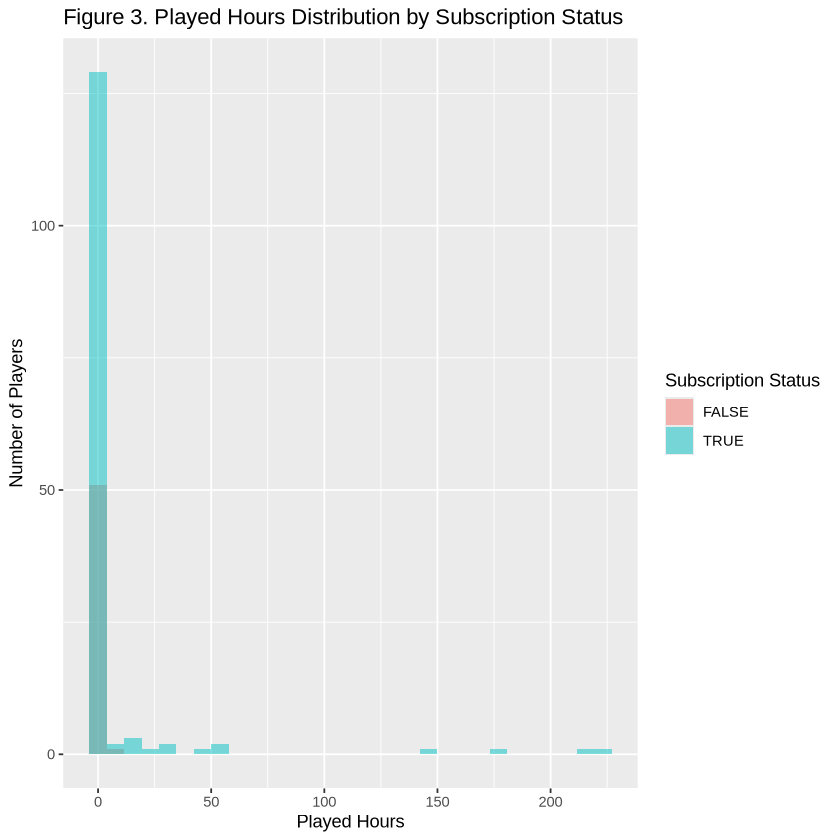

In [32]:
played_hours_plot <- ggplot(clean_players, aes(x = played_hours, fill = subscribe)) +
  geom_histogram(position = "identity", alpha = 0.5, bins = 30) +
  labs(title = "Figure 3. Played Hours Distribution by Subscription Status",
       x = "Played Hours",
       y = "Number of Players",
       fill = "Subscription Status")
played_hours_plot

**Figure 3. Played Hours Distribution by Subscription Status:**  
This histogram shows the distribution of total play hours among players, with bars colored by subscription status. Most players played for a short time (less than 5 hours), while only a few played over 50 or even 200 hours. The distribution is highly right-skewed, indicating that long play sessions are rare regardless of subscription status.

The dataset was cleaned by retaining only relevant variables (subscribe, played_hours, and experience) and removing rows with missing values. A stratified 70/30 split was used to create training and testing sets. The numeric variable played_hours was centered and scaled to address its right-skewed distribution.

Three visualizations were used for exploratory data analysis. Figure 1 shows the model’s prediction results with 44 correct and 16 incorrect classifications. Figure 2 displays subscription rates by experience level, with the “Regular” group showing a slightly higher proportion. Figure 3 confirms the highly skewed distribution of play time, justifying normalization.

A k-nearest neighbors (k-NN) classifier with a rectangular kernel was used. The optimal value of k = 45 was selected based on 5-fold cross-validation over odd values from 1 to 50, using accuracy as the evaluation metric. The finalized model was trained on the full training set and tested on the test set, with performance evaluated using classification accuracy and a confusion matrix.

## Discussion

The analysis revealed that experience level and played hours had limited predictive value for newsletter subscription. As shown in Figure 3, most players had short play times, with only a few extreme values. Figure 2 showed that subscription rates across experience levels were relatively consistent, with the “Regular” group showing a slightly higher rate. The tuned k-NN model achieved an accuracy of 73.3%, correctly predicting 44 cases and misclassifying 16 (Figure 1). This suggests that these features alone do not offer strong predictive power.

It was initially expected that players with longer play time and higher experience would be more likely to subscribe, based on the idea that greater engagement leads to higher interest. For instance, “Veteran” or “Pro” users were assumed to be more inclined to subscribe. However, the actual distribution did not clearly support these expectations, and the model performance further indicated that the assumption was only partially valid.

These findings highlight the limitation of using surface-level game metrics to predict behavior. Relying only on play time or experience may be insufficient for identifying high-engagement users or developing effective marketing strategies. Adding more detailed behavioral features such as session duration, in-game interactions, or social activity may help improve prediction accuracy. These results provide useful insights for developers seeking to enhance retention or user targeting.

Future research could examine alternative features such as login frequency, content preferences, or player network size to better explain subscription behavior. It may also be valuable to test other classification models such as decision trees, logistic regression, or ensemble methods to improve accuracy. These findings raise further questions about player motivation and game context, which are not captured in the current dataset.